In [1]:
#kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
#veri seti yükleme
veri = pd.read_csv('data.csv')
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#boş sütunu ve gereksiz sütunun kaldırılması
veri.dropna(axis=1, inplace=True)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# M(malignant) ve B(benign) değerlerini 1,0 olarak değiştirme
veri.diagnosis.replace({'M':1, 'B':0}, inplace=True)

In [5]:
#teşhislerin sayısı
veri["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Korelasyon Haritası')

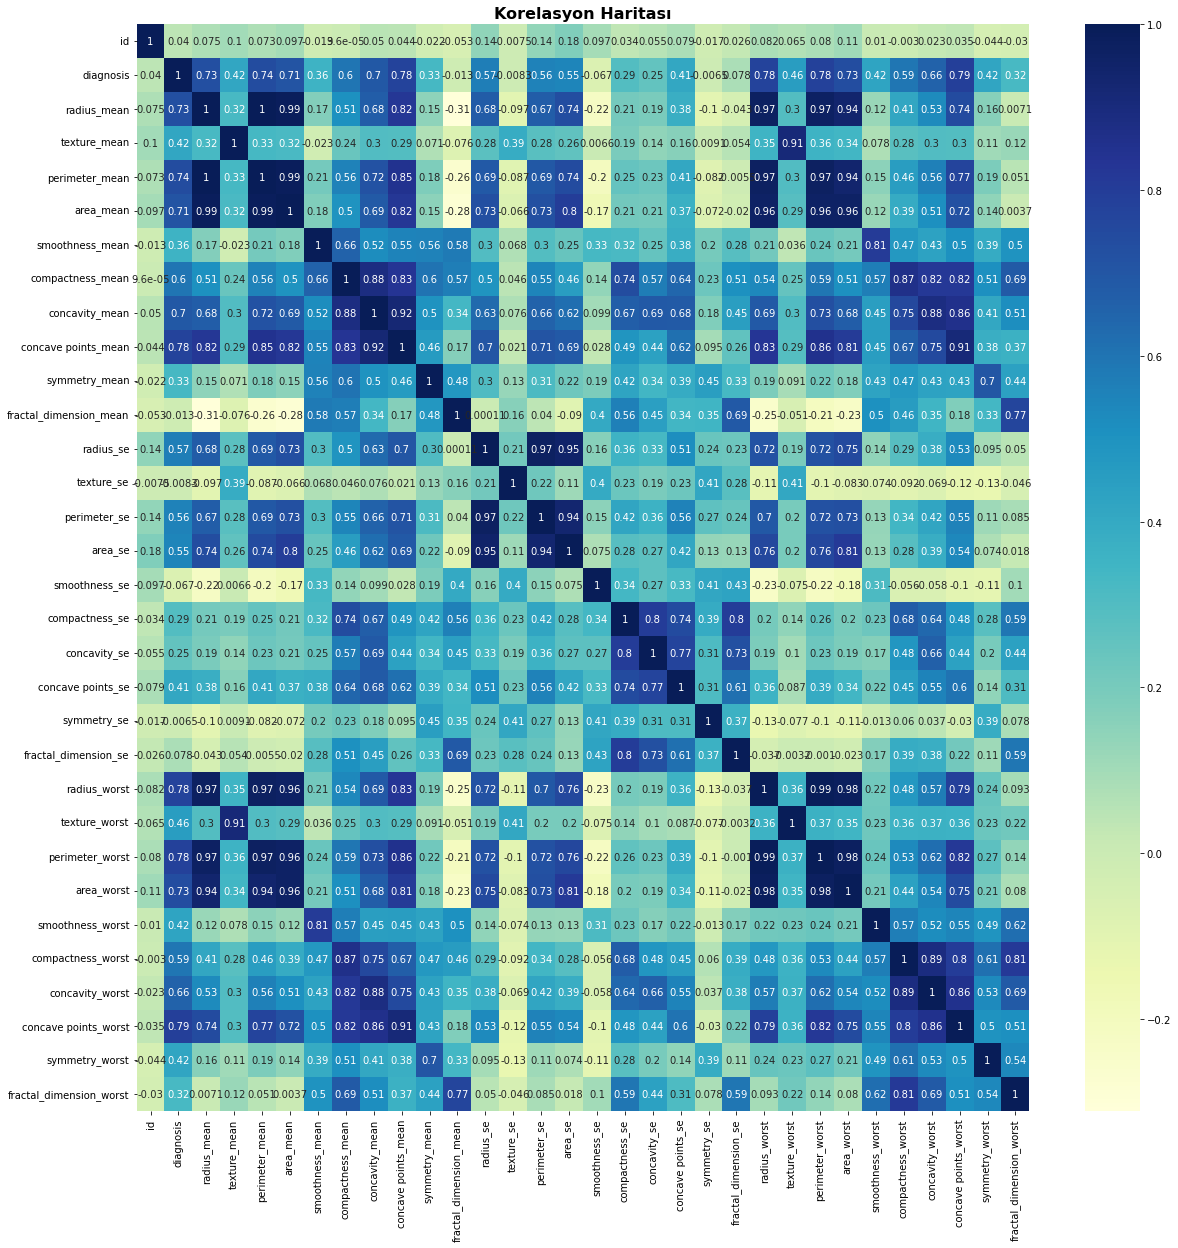

In [6]:
#aykırı verileri belirleme (korelasyon ile)
korelasyon = veri.corr()
plt.figure(figsize=(20,20))
sb.heatmap(veri.corr(), cmap='YlGnBu', annot = True)
plt.title("Korelasyon Haritası", fontweight = "bold", fontsize=16)

In [7]:
#Özellik ve Etiket seçimi
x=veri.iloc[:,2:].values
y=veri.iloc[:,1].values

In [8]:
#özellikleri sayısallaştırma (isim yerine 0-(özelliksayısı -1) arasında sayı verir)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [9]:
#train-test olarak veriyi ayırma
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#print(x_test)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [12]:
#yapay sinir ağları başlatılıyor
model=Sequential()

In [13]:
#giriş (ilk gizli) katmanını
model.add(Dense(16,activation='relu', input_dim=30))
#overfitting önlemek için dropout
model.add(Dropout(0.2))
#ikinci gizli katman
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))


In [14]:
#çıktı katmanının eklenmesi
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [15]:
#YSA yapılandırma
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#YSA'nın eğitilmesi
history=model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 43ms/step - loss: 0.6143 - accuracy: 0.6731 - val_loss: 0.5463 - val_accuracy: 0.6593
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5585 - accuracy: 0.6923 - val_loss: 0.5095 - val_accuracy: 0.7033
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.7060 - val_loss: 0.4768 - val_accuracy: 0.7802
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7692 - val_loss: 0.4480 - val_accuracy: 0.8462
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.7747 - val_loss: 0.4226 - val_accuracy: 0.8791
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4484 - accuracy: 0.8159 - val_loss: 0.4000 - val_accuracy: 0.8901
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4357 - accuracy: 0.8626 - val_loss: 0.3796 - val_accuracy: 0.8901
Epoch 8/100
4/4 [=========

In [17]:
#test seti sonuçlarını tahmin etme
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print('score is:',score*100)

score is: 98.24561403508771


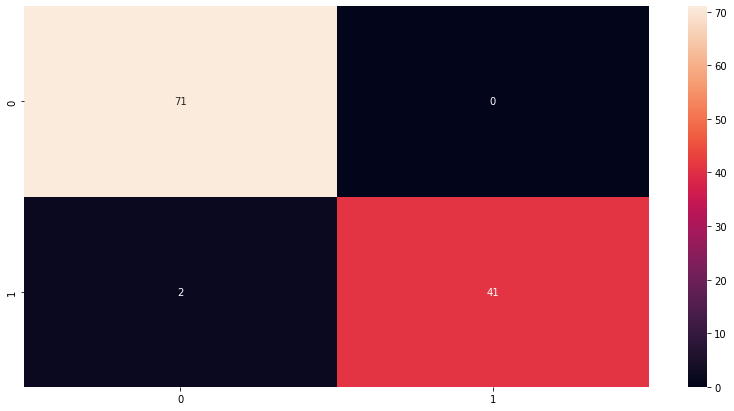

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


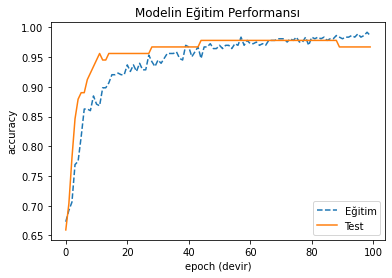

In [20]:
# tüm verilerin listesi
print(history.history.keys())
# doğruluk grafiği
plt.plot(history.history['accuracy'],"--")
plt.plot(history.history['val_accuracy'])
plt.title('Modelin Eğitim Performansı')
plt.ylabel('accuracy')
plt.xlabel('epoch (devir)')
plt.legend(['Eğitim', 'Test'], loc='lower right')
plt.show()

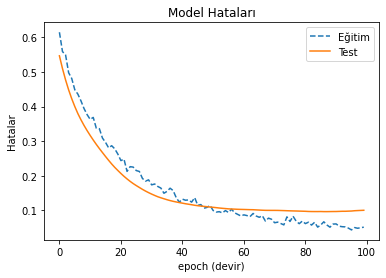

In [21]:
#hata grafiği
plt.plot(history.history['loss'],"--")
plt.plot(history.history['val_loss'])
plt.title('Model Hataları')
plt.ylabel('Hatalar')
plt.xlabel('epoch (devir)')
plt.legend(['Eğitim', 'Test'], loc='upper right')
plt.show()

In [23]:
#model dosyası oluşturma
#model.save('bc-model.h5')